# ***Methane Mapper Proof with their Filter***

In [2]:
import numpy as np

In [85]:
rgb = np.load('data_test/rgb/ang20200806t195009_rdn_v2y1_img_49_2.npy')

In [86]:
rgb.shape

(256, 256, 3)

In [6]:
import matplotlib.pyplot as plt

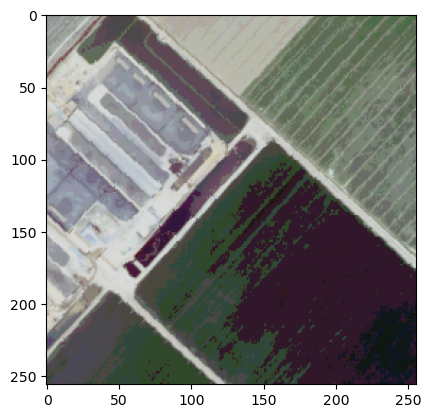

In [88]:
plt.imshow(rgb)

In [237]:
cube = np.load('data_test/cube/ang20200806t195009_rdn_v2y1_img_49_2.npy')

In [238]:
cube.shape

(256, 256, 90)

In [239]:
print(cube.min(), cube.max())

0.001750056 0.22039162


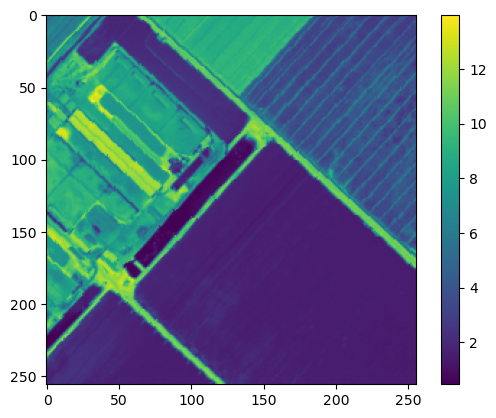

In [240]:
plt.imshow(cube.sum(axis=2))
plt.colorbar()

In [241]:
from train_dataset_generator.match_filter import match_filter

In [242]:
target = np.loadtxt('data/gas_signature/methane_signature.txt')
print(target[335:, 2].shape)
target = target[335:, 2]

(90,)


In [243]:
alpha = match_filter(cube, target, num_columns=2)

Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 2)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 4)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 6)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 8)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 10)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 12)
Calculating ga

In [244]:
# Normalize cube across channels (min-max normalization)
cube_min = cube.min()
cube_max = cube.max()
cube_normalized = (cube - cube_min) / (cube_max - cube_min)
print(f"Original range: [{cube_min:.6f}, {cube_max:.6f}]")
print(f"Normalized range: [{cube_normalized.min():.6f}, {cube_normalized.max():.6f}]")

Original range: [0.001750, 0.220392]
Normalized range: [0.000000, 1.000000]


In [245]:
alpha_min = alpha.min()
alpha_max = alpha.max()

alpha_normalized = (alpha - alpha_min) / (alpha_max - alpha_min)

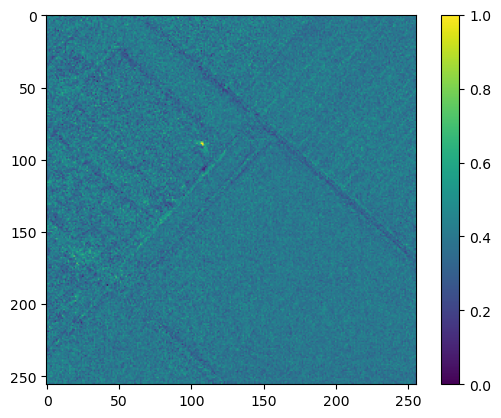

In [246]:
plt.imshow(alpha_normalized, cmap='viridis')
plt.colorbar()

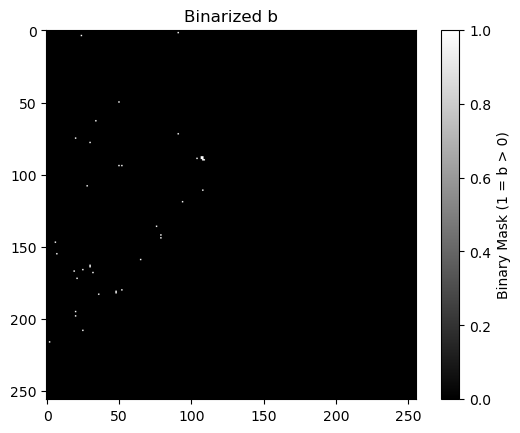

In [250]:
a_binary = (alpha_normalized > 0.65).astype(int)
plt.imshow(a_binary, cmap='gray')
plt.colorbar(label="Binary Mask (1 = b > 0)")
plt.title("Binarized b")
plt.show()

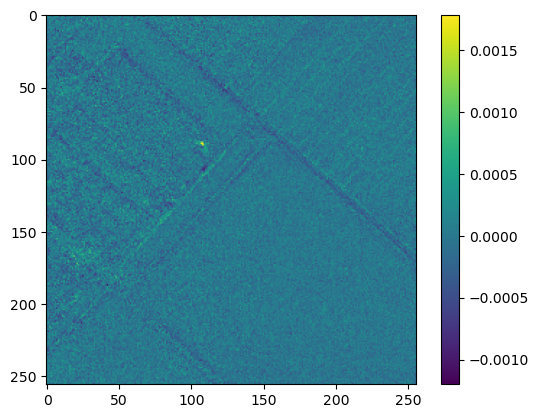

In [183]:
plt.imshow(alpha, cmap='viridis')
plt.colorbar()

(array([6.0000e+00, 1.6800e+02, 3.3660e+03, 2.8522e+04, 2.9781e+04,
        3.5130e+03, 1.7200e+02, 5.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([-1.19794970e-03, -8.99308306e-04, -6.00666913e-04, -3.02025520e-04,
        -3.38412629e-06,  2.95257267e-04,  5.93898660e-04,  8.92540053e-04,
         1.19118145e-03,  1.48982284e-03,  1.78846423e-03]),
 <BarContainer object of 10 artists>)

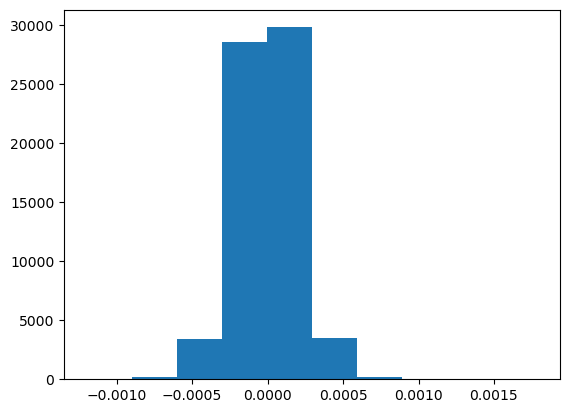

In [193]:
plt.hist(alpha.flatten())

In [184]:
# 0.01370905301304899

alpha.max() - alpha.min()

0.0029864139325149128

predicho por la red

(-0.5, 255.5, 255.5, -0.5)

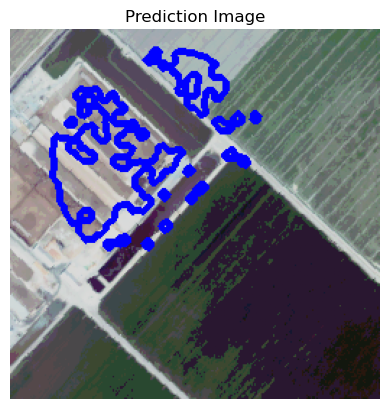

In [82]:
img = plt.imread('methanemapper/data/visual_preds/ang20200806t195009_rdn_v2y1_img_49_2.png')
plt.imshow(img)
plt.title("Prediction Image")
plt.axis('off')  # Hide axes for better visualization

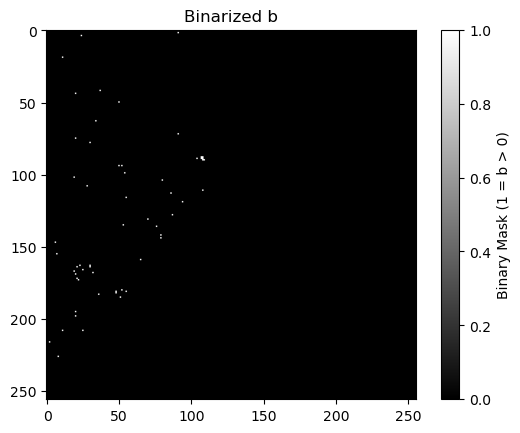

In [192]:
a_binary = (alpha > 0.0007).astype(int)
plt.imshow(a_binary, cmap='gray')
plt.colorbar(label="Binary Mask (1 = b > 0)")
plt.title("Binarized b")
plt.show()

## ***normalize***

In [251]:
# Normalize cube across channels (min-max normalization)
cube_min = cube.min()
cube_max = cube.max()
cube_normalized = (cube - cube_min) / (cube_max - cube_min)
print(f"Original range: [{cube_min:.6f}, {cube_max:.6f}]")
print(f"Normalized range: [{cube_normalized.min():.6f}, {cube_normalized.max():.6f}]")


Original range: [0.001750, 0.220392]
Normalized range: [0.000000, 1.000000]


In [252]:
target = np.loadtxt('data/gas_signature/methane_signature.txt')
print(target[335:, 2].shape)
target = target[335:, 2]

(90,)


In [253]:
alpha = match_filter(cube_normalized, target, num_columns=2)

Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 2)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 4)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 6)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 8)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 10)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (256, 2, 90) target_mean :  (90,)
Cols computed so far : (256, 12)
Calculating ga

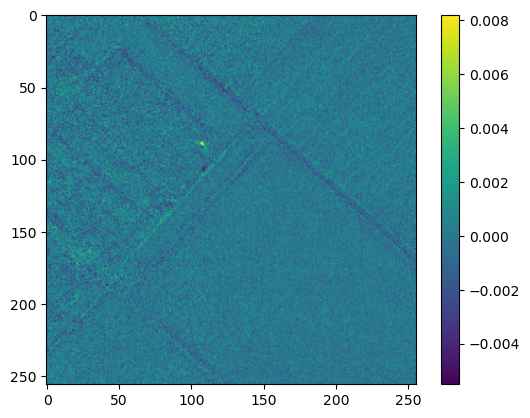

In [254]:
plt.imshow(alpha, cmap='viridis')
plt.colorbar()

In [255]:
alpha.max() - alpha.min()

0.01370905301304899

In [256]:
alpha_min = alpha.min()
alpha_max = alpha.max()

alpha_normalized = (alpha - alpha_min) / (alpha_max - alpha_min)

(array([6.0000e+00, 1.6600e+02, 3.3370e+03, 2.8494e+04, 2.9844e+04,
        3.5100e+03, 1.7100e+02, 5.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

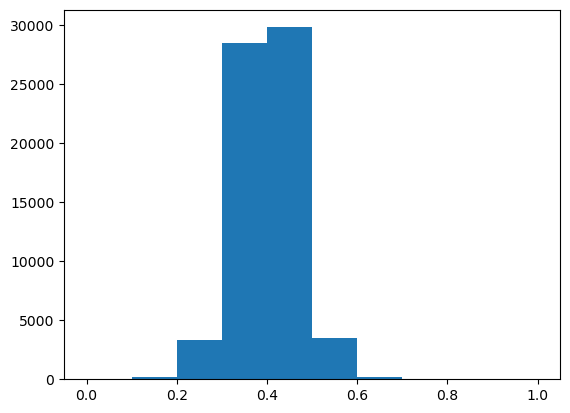

In [257]:
plt.hist(alpha_normalized.flatten())

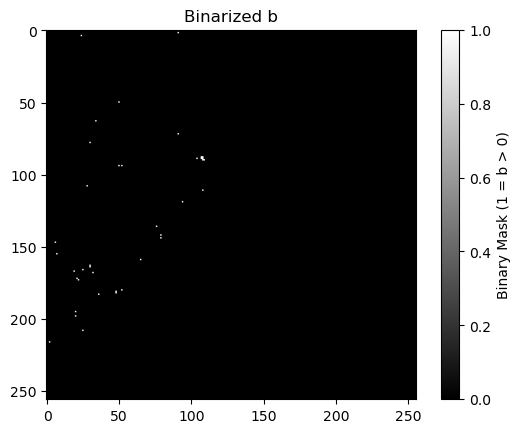

In [258]:
a_binary = (alpha_normalized > 0.65).astype(int)
plt.imshow(a_binary, cmap='gray')
plt.colorbar(label="Binary Mask (1 = b > 0)")
plt.title("Binarized b")
plt.show()

## our cubes

In [277]:
from spectral import open_image
img_hdr_swir = open_image(r"ENMAP.HSI.L1B-20250608T015124Z-1-001/ENMAP.HSI.L1B/ENMAP01_003_V010502_20250506T214732Z/ENMAP01-____L1B-DT0000058231_20240123T155834Z_003_V010502_20250506T214732Z-SPECTRAL_IMAGE_SWIR.HDR") # Usa el .hdr y carga los datos asociados
img_hdr_swir.shape

(1024, 1000, 133)

In [278]:
# Convert the BsqFile object to a numpy array
cube_swir = img_hdr_swir.load()
print(f"SWIR cube shape: {cube_swir.shape}")

SWIR cube shape: (1024, 1000, 133)


In [279]:
cube_swir.min(), cube_swir.max()

(1.0, 65535.0)

In [4]:
target = np.loadtxt('data/gas_signature/methane_signature.txt')
print(target[:, 2].shape)
target = target[:, 2]

(425,)


de la 106 a la 414 hay que sacar 133

Methane signature shape: (133,)
First 5 values: [0. 0. 0. 0. 0.]
Last 5 values: [-0.2838009  -0.10808051 -0.15938908 -0.08143865 -0.05488306]


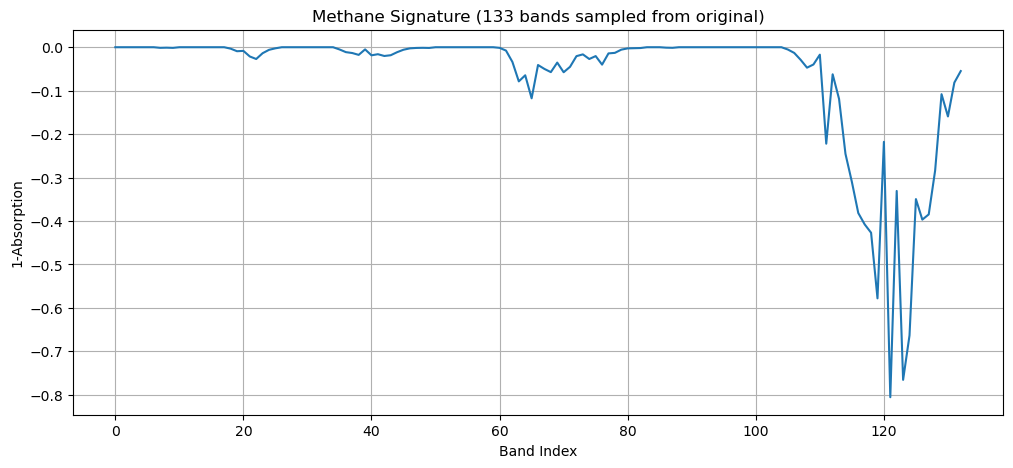

In [7]:
# Extract methane signature features for EnMAP SWIR
# We need to sample 133 points from indices 106-414 of the methane signature

# Calculate evenly spaced indices from the range 106-414
start_idx = 106
end_idx = 414
num_bands = 133  # Number of bands in the SWIR image

# Create evenly spaced indices
indices = np.linspace(start_idx, end_idx, num_bands, dtype=int)

# Extract the methane signature features at these indices
methane_signature = target[indices]

print(f"Methane signature shape: {methane_signature.shape}")
print(f"First 5 values: {methane_signature[:5]}")
print(f"Last 5 values: {methane_signature[-5:]}")

# Plot the methane signature
plt.figure(figsize=(12, 5))
plt.plot(methane_signature)
plt.title('Methane Signature (133 bands sampled from original)')
plt.xlabel('Band Index')
plt.ylabel('1-Absorption')
plt.grid(True)
plt.show()

In [282]:
alpha = match_filter(img_hdr_swir, methane_signature, num_columns=2)

Calculating gausian stats, mean, cov of background


Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 2)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 4)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 6)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 8)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 10)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 12)
Calculating gausian stats, mean, cov of b

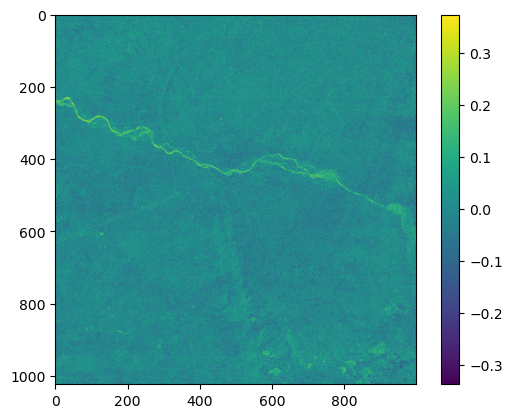

In [283]:
plt.imshow(alpha, cmap='viridis')
plt.colorbar()

In [284]:
alpha_min = alpha.min()
alpha_max = alpha.max()

alpha_normalized = (alpha - alpha_min) / (alpha_max - alpha_min)

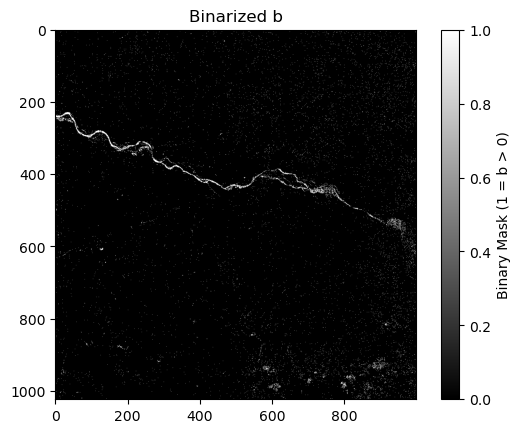

In [285]:
a_binary = (alpha_normalized > 0.65).astype(int)
plt.imshow(a_binary, cmap='gray')
plt.colorbar(label="Binary Mask (1 = b > 0)")
plt.title("Binarized b")
plt.show()

(array([9.00000e+00, 2.58000e+02, 9.42500e+03, 1.45814e+05, 4.98498e+05,
        3.21032e+05, 4.44820e+04, 3.83800e+03, 5.95000e+02, 4.90000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

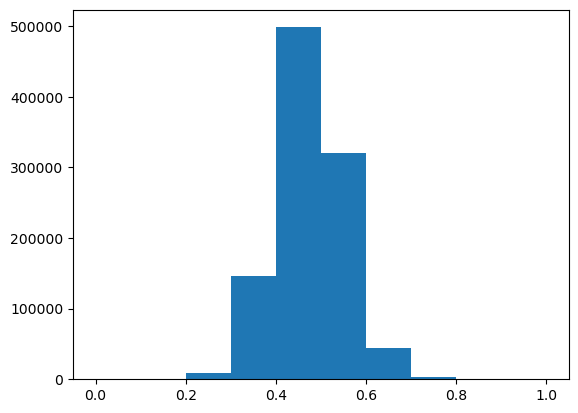

In [286]:
plt.hist(alpha_normalized.flatten())

without river

In [287]:
import tifffile
img_classes = tifffile.imread(r"ENMAP.HSI.L1B-20250608T015124Z-1-001/ENMAP.HSI.L1B/ENMAP01-____L1B-DT0000086892_20240810T154338Z_001_V010502_20250604T034334Z/ENMAP01-____L1B-DT0000086892_20240810T154338Z_001_V010502_20250604T034334Z-SPECTRAL_IMAGE_SWIR.TIF")
img_classes.shape

(133, 1024, 1000)

In [288]:
cube = np.transpose(img_classes, (1, 2, 0))
cube.shape

(1024, 1000, 133)

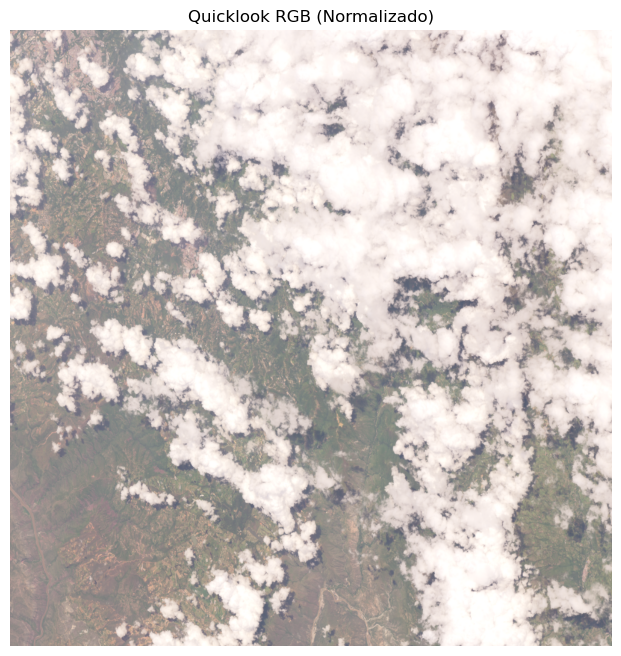

(1024, 1000)


In [289]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ruta del archivo
path = 'ENMAP.HSI.L1B-20250608T015124Z-1-001/ENMAP.HSI.L1B/ENMAP01-____L1B-DT0000086892_20240810T154338Z_001_V010502_20250604T034334Z/ENMAP01-____L1B-DT0000086892_20240810T154338Z_001_V010502_20250604T034334Z-QL_VNIR.TIF'
# Abrir y leer bandas RGB
with rasterio.open(path) as src:
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)

# Apilar en una imagen RGB
rgb = np.stack([r, g, b], axis=-1)

# Normalizar a [0, 1] si los valores son muy altos
rgb_norm = rgb / np.max(rgb)

# Visualización
plt.figure(figsize=(8, 8))
plt.imshow(rgb_norm)
plt.axis('off')
plt.title("Quicklook RGB (Normalizado)")
plt.show()

print(src.shape)

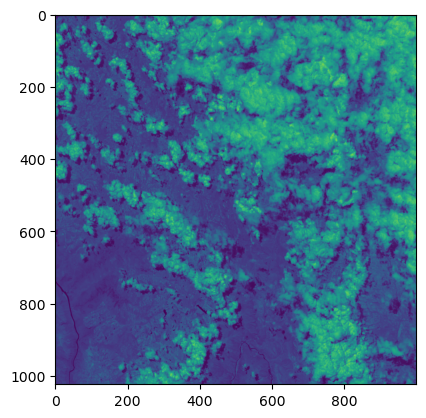

In [290]:
plt.imshow(cube.sum(axis=2))

In [291]:
alpha = match_filter(cube, methane_signature, num_columns=2)

Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 2)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 4)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 6)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 8)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (1024, 10)
Calculating gausian stats, mean, cov of background
Calculating stats of matchFilter...
b_img_data (1024, 2, 133) target_mean :  (133,)
Cols computed so far : (

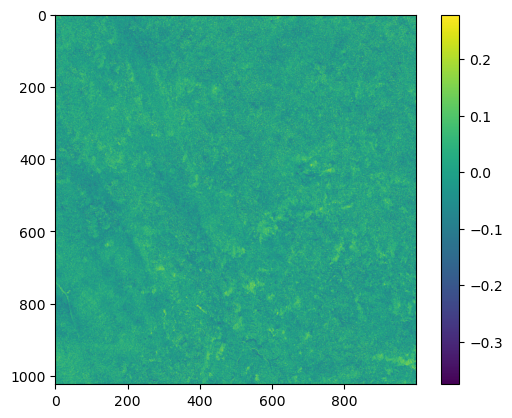

In [292]:
plt.imshow(alpha, cmap='viridis')
plt.colorbar()

In [293]:
alpha_min = alpha.min()
alpha_max = alpha.max()

alpha_normalized = (alpha - alpha_min) / (alpha_max - alpha_min)

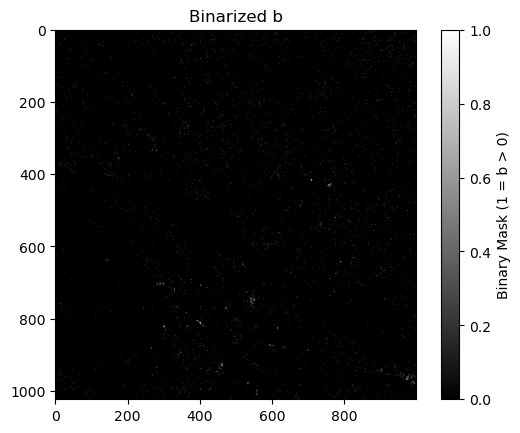

In [299]:
a_binary = (alpha_normalized > 0.8).astype(int)
plt.imshow(a_binary, cmap='gray')
plt.colorbar(label="Binary Mask (1 = b > 0)")
plt.title("Binarized b")
plt.show()

(array([1.00000e+00, 1.30000e+01, 8.12000e+02, 1.94350e+04, 1.69127e+05,
        4.50037e+05, 3.20086e+05, 6.09090e+04, 3.50000e+03, 8.00000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

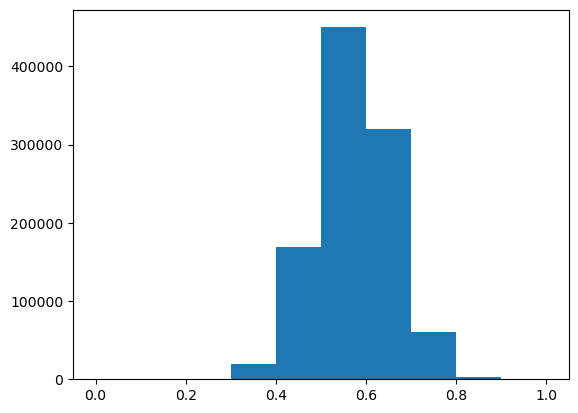

In [295]:
plt.hist(alpha_normalized.flatten())

{'whiskers': [<matplotlib.lines.Line2D at 0x7bece80a5db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bece823eec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bece80a44c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bece816e140>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bece81a98a0>],
 'means': []}

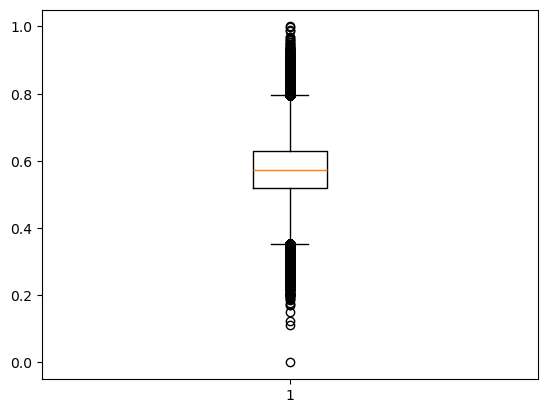

In [297]:
plt.boxplot(alpha_normalized.flatten())